# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

# Importing Dataset into Dataframe

In [2]:
data=pd.read_csv("./HousingData.csv")

In [3]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# Data Analysis

In [4]:
data.shape

(506, 14)

In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

# Data Preprocessing

In [8]:
data.fillna(value=0, inplace=True)

In [9]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,0.00,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,0.00,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# Exploratory Data Analysis

## Create a Boxplot To check the Presence of outliers

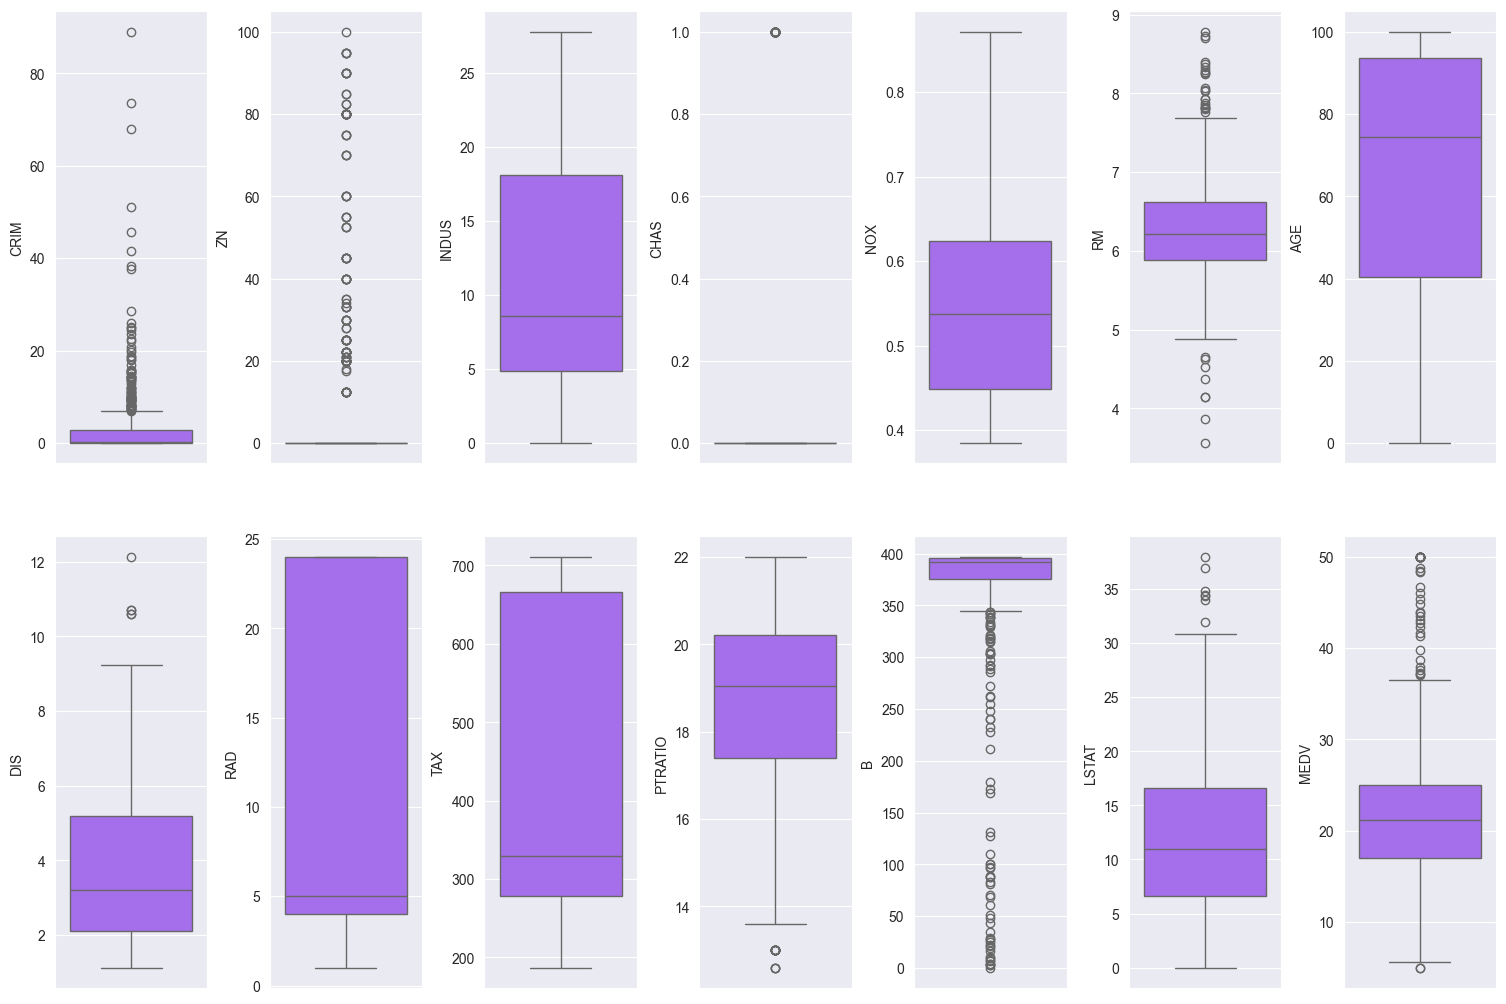

In [11]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(15, 10))
index = 0
ax = ax.flatten()

for col, value in data.items():
    sns.boxplot(y=col, data=data, ax=ax[index], color="#A259FF")
    index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

## Create a Distplot to check the Distribution of Data  

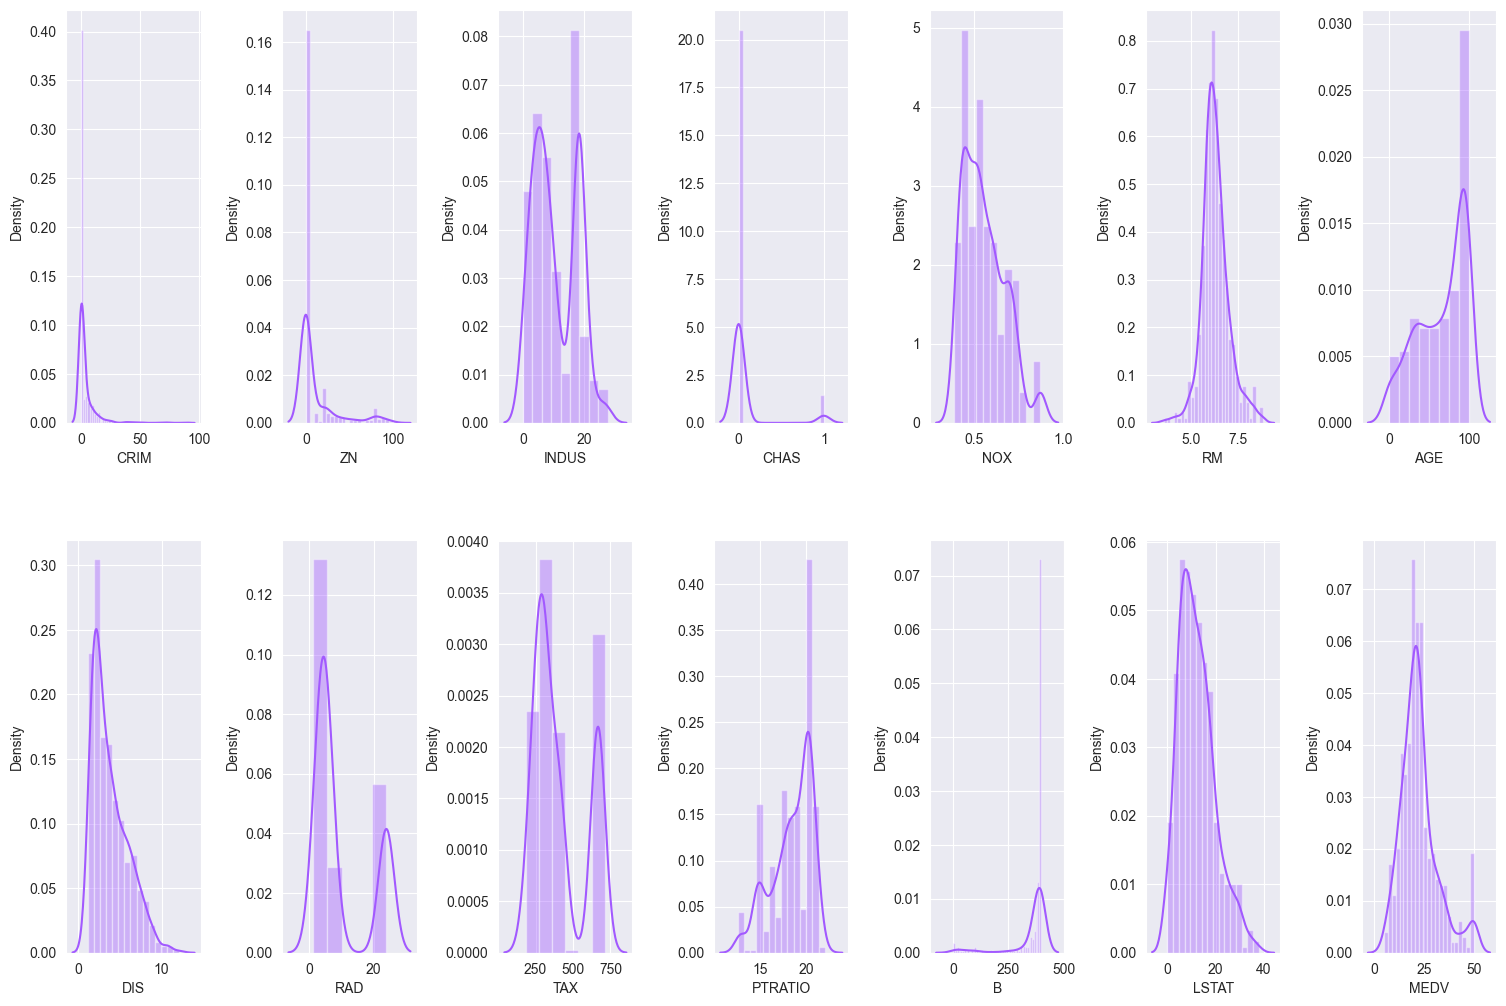

In [12]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(15, 10))
index = 0
ax = ax.flatten()

for col, value in data.items():
    sns.distplot(value, ax=ax[index], color="#A259FF")
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

## Min-Max Normalization

In [13]:
cols = ["CRIM", "ZN", "TAX", "B"]
for col in cols:
    # find minimum and maximum of that column
    minimum = min(data[col])
    maximum = max(data[col])
    data[col] = (data[col] - minimum) / (maximum - minimum)

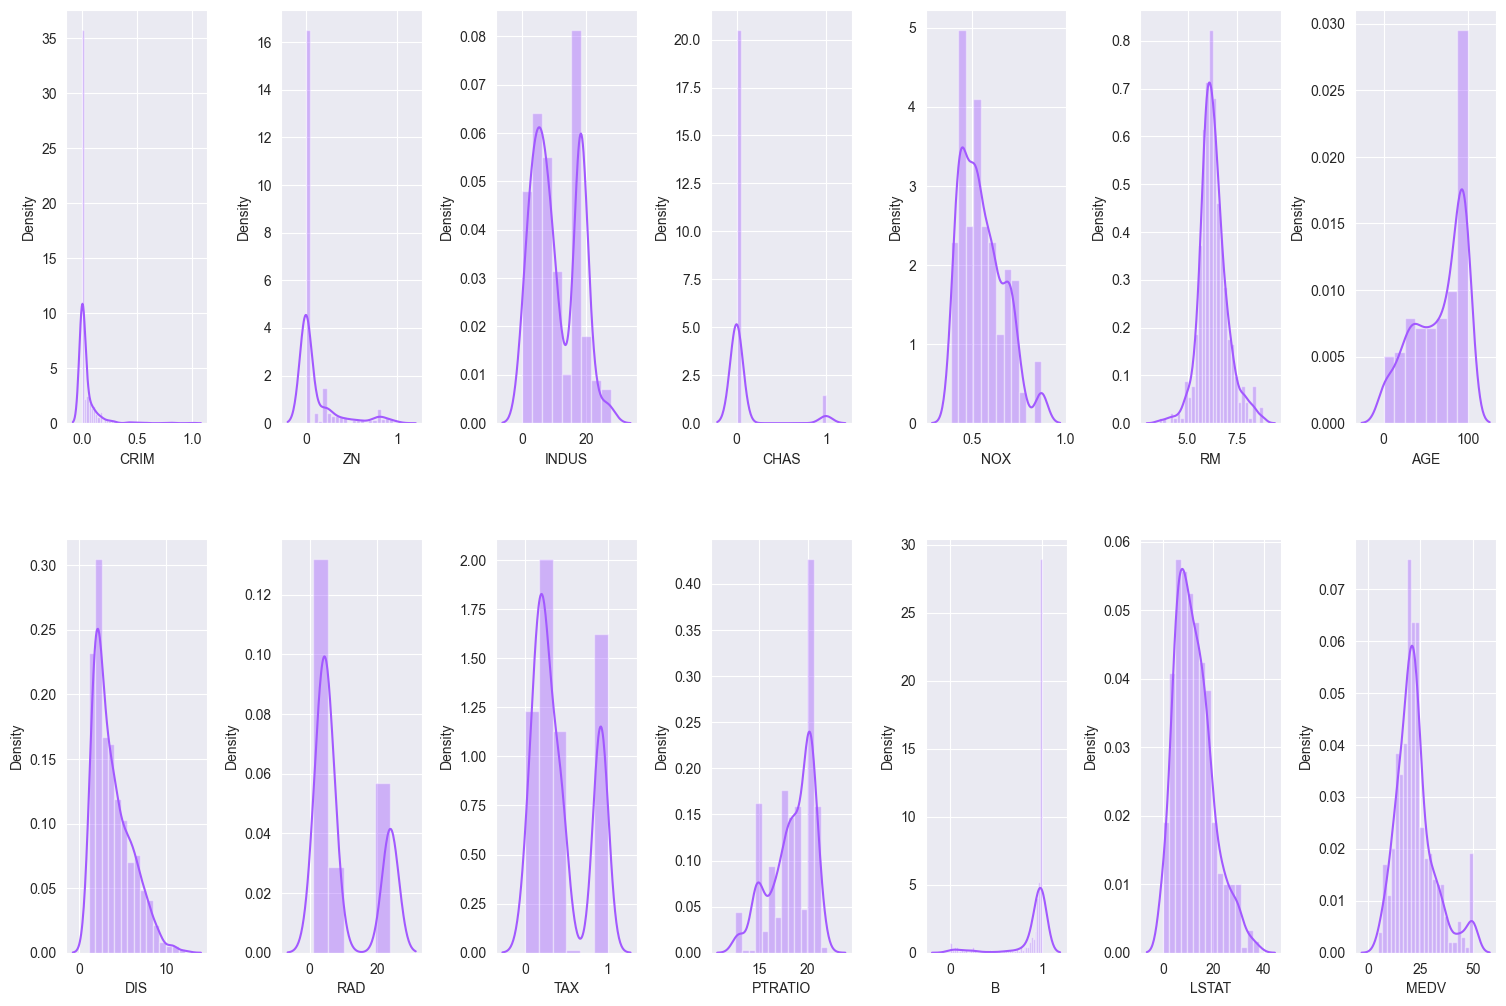

In [14]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(15, 10))
index = 0
ax = ax.flatten()

for col, value in data.items():
    sns.distplot(value, ax=ax[index], color="#A259FF")
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

## Standardization

In [15]:
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

# fit our data
scaled_cols = scalar.fit_transform(data[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns=cols)
scaled_cols.head()

,CRIM,ZN,TAX,B
0,-0.404235,0.314369,-0.666608,0.441052
1,-0.401785,-0.468160,-0.987329,0.441052
2,-0.401787,-0.468160,-0.987329,0.396427
3,-0.401194,-0.468160,-1.106115,0.416163
4,-0.396912,-0.468160,-1.106115,0.441052


In [16]:
for col in cols:
    data[col] = scaled_cols[col]

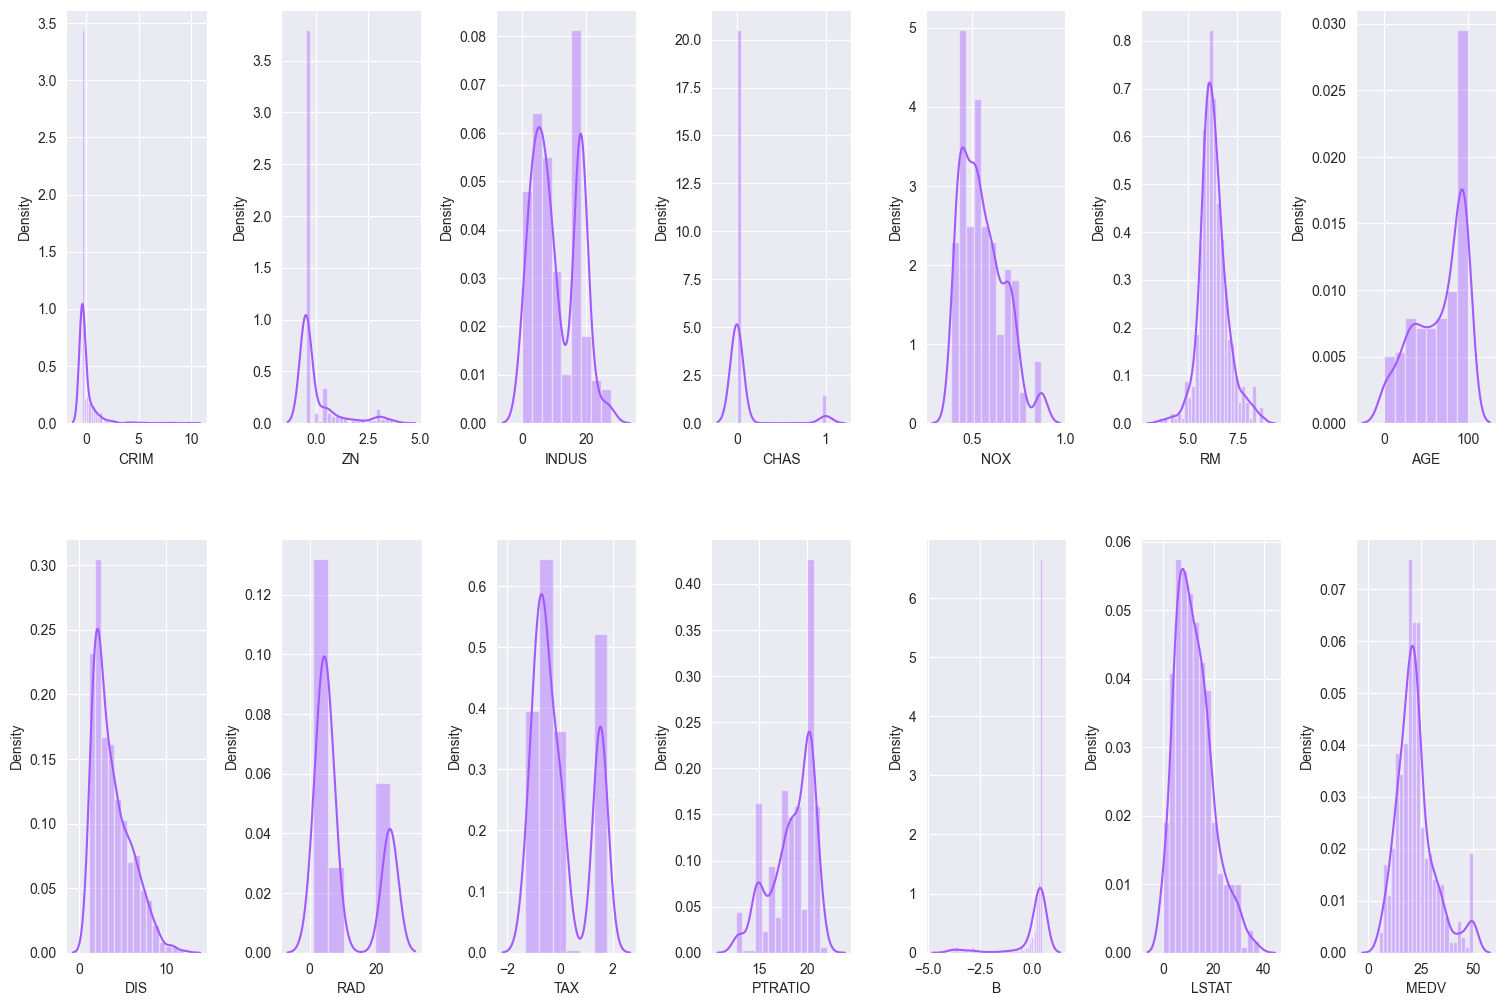

In [17]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(15, 10))
index = 0
ax = ax.flatten()

for col, value in data.items():
    sns.distplot(value, ax=ax[index], color="#A259FF")
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

## Coorelation Matrix

<Axes: >

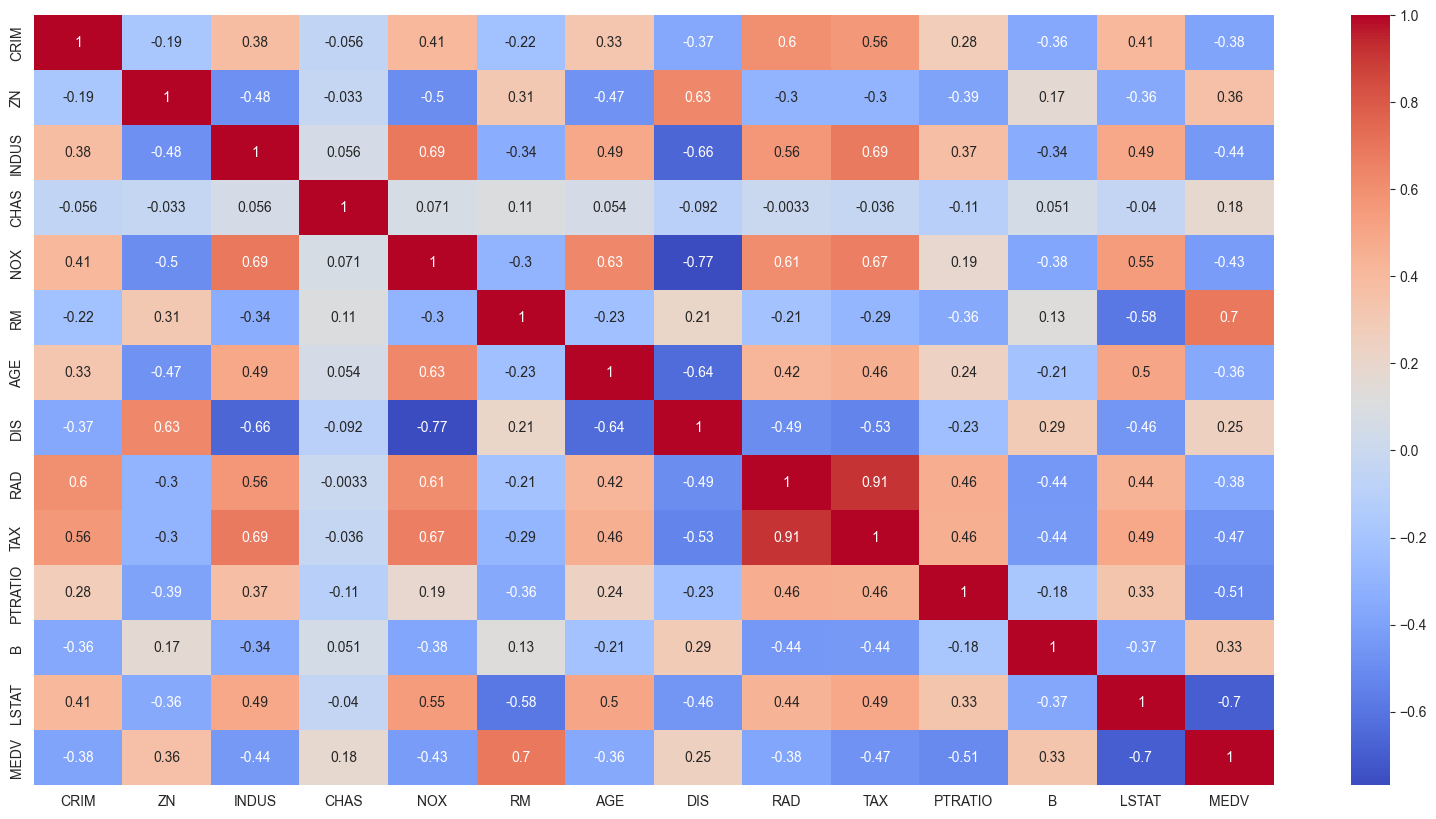

In [18]:
corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

<Axes: xlabel='RM', ylabel='MEDV'>

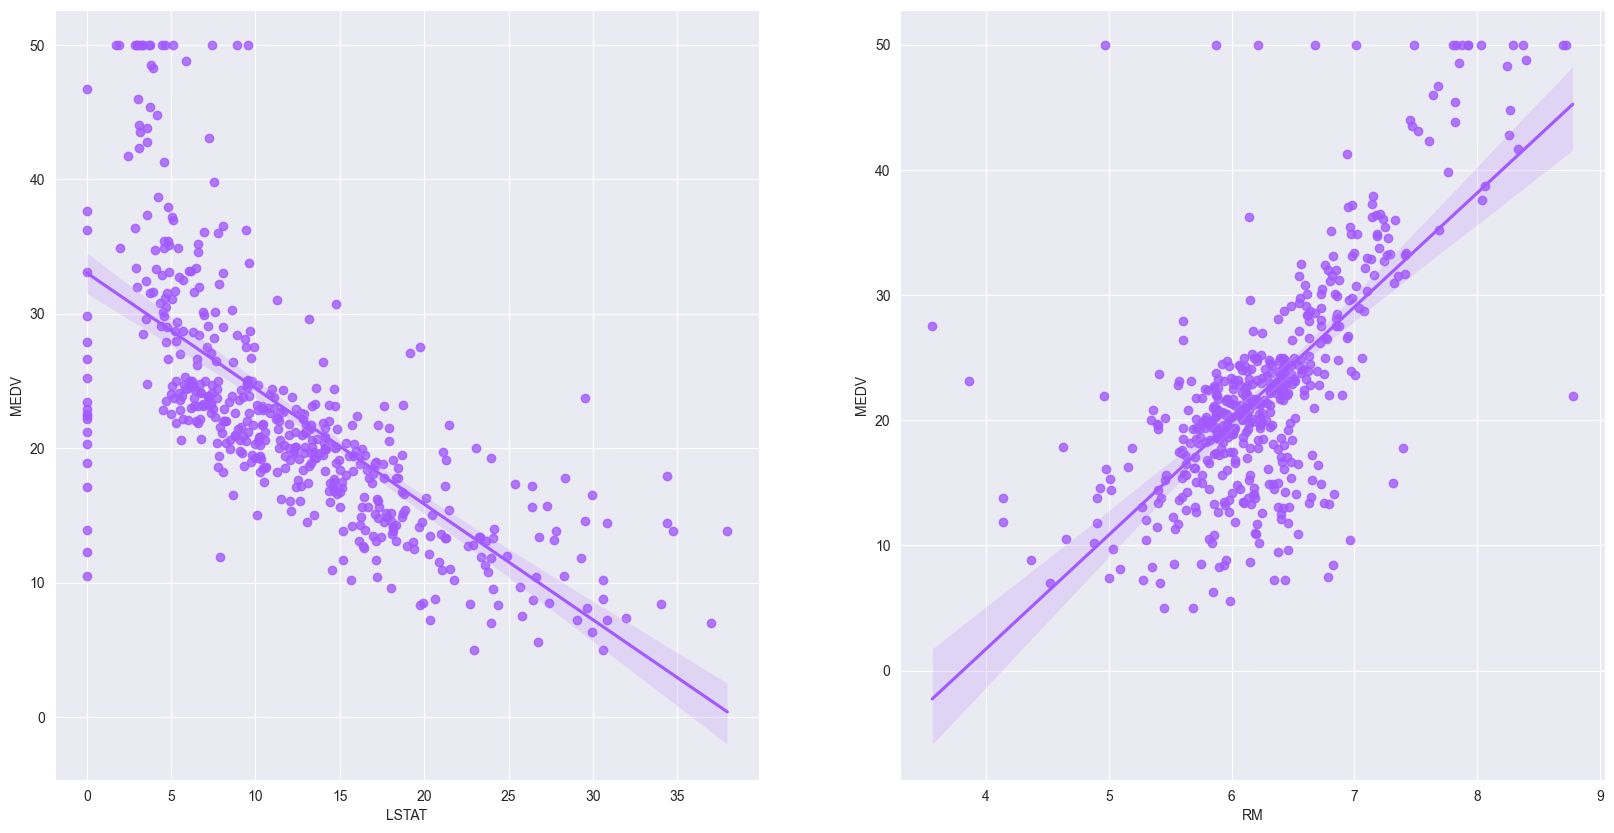

In [19]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
ax = ax.flatten()
sns.regplot(y=data['MEDV'], x=data['LSTAT'], color="#A259FF", ax=ax[0])
sns.regplot(y=data['MEDV'], x=data['RM'], color="#A259FF", ax=ax[1])

## Input Split

In [20]:
X = data.drop(columns=['MEDV', 'RAD'], axis=1)
y = data['MEDV']

In [21]:
data.insert(14, "LinearRegression", value=0)
data.insert(15, "DecisionTreeRegressor", value=0)
data.insert(16, "RandomForestRegressor", value=0)
data.insert(17, "ExtraTreesRegressor", value=0)
data.insert(18, "XGBRegressor", value=0)

In [22]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, X, y, colnum):
    # train the model
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)
    model.fit(x_train, y_train)

    # predict the training set
    pred = model.predict(x_test)

    for i in range(0,506,1):
        data.iat[i,colnum]=model.predict([[data.iat[i,0],data.iat[i,1],data.iat[i,2],data.iat[i,3],data.iat[i,4],data.iat[i,5],data.iat[i,6],data.iat[i,7],data.iat[i,9],data.iat[i,10],data.iat[i,11],data.iat[i,12]]])
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))

    print("Model Report")
    print("MSE:",mean_squared_error(y_test, pred))
    print('CV Score:', cv_score)

## Linear Regression Model

Model Report
MSE: 24.551492874892816
CV Score: 35.62426669492891


<Axes: title={'center': 'Model Coefficients'}>

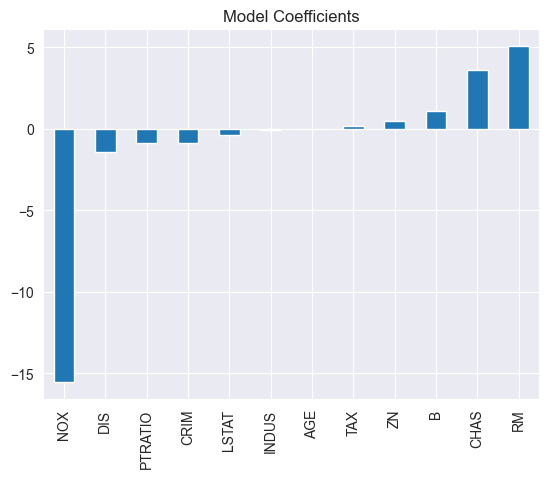

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
train(model, X, y, 14)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

## DecisionTreeRegressor

Model Report
MSE: 11.880551181102364
CV Score: 40.77013511939429


<Axes: title={'center': 'Feature Importance'}>

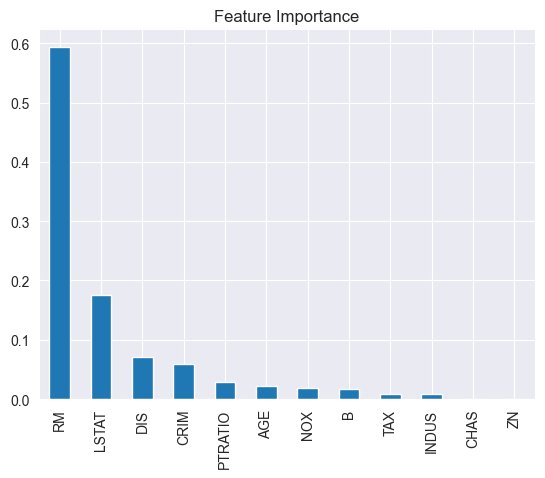

In [24]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y,15)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

## RandomForestRegressor

Model Report
MSE: 9.56727062992127
CV Score: 21.074306526752075


<Axes: title={'center': 'Feature Importance'}>

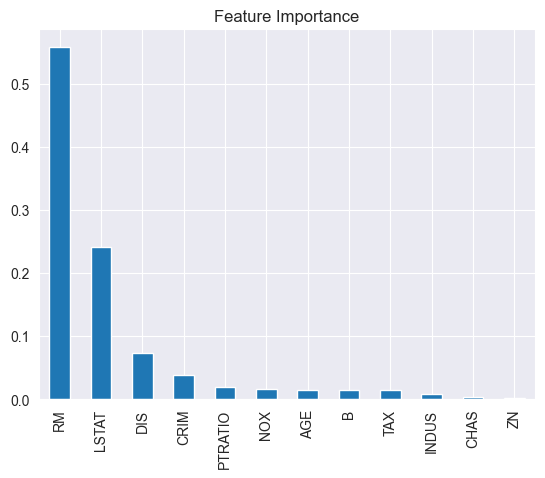

In [25]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y,16)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

##  ExtraTreesRegressor

Model Report
MSE: 12.178114944881901
CV Score: 21.273600027334485


<Axes: title={'center': 'Feature Importance'}>

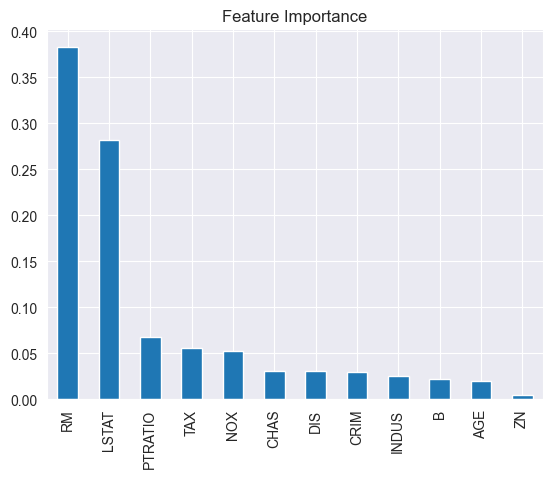

In [26]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X, y,17)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

## XGBRegressor

Model Report
MSE: 10.410046094949337
CV Score: 26.044256432250695


<Axes: title={'center': 'Feature Importance'}>

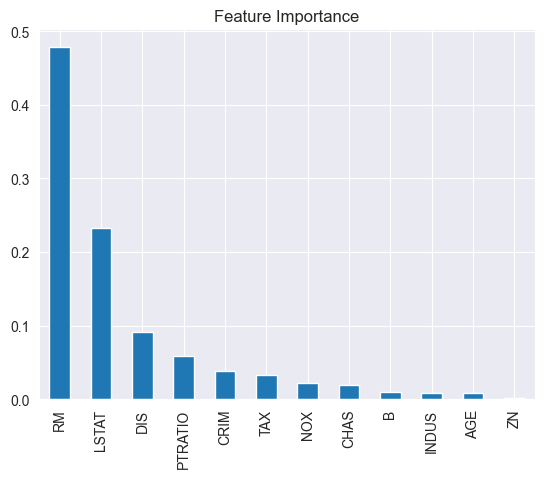

In [27]:
import xgboost as xgb
model = xgb.XGBRegressor()
train(model, X, y, 18)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

In [28]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,ExtraTreesRegressor,XGBRegressor
0,-0.404235,0.314369,2.31,0.0,0.538,6.575,65.2,4.0900,1,-0.666608,15.3,0.441052,4.98,24.0,30.359578,23.8,27.973,28.003,27.449017
1,-0.401785,-0.468160,7.07,0.0,0.469,6.421,78.9,4.9671,2,-0.987329,17.8,0.441052,9.14,21.6,24.548063,21.6,22.240,21.600,21.595337
2,-0.401787,-0.468160,7.07,0.0,0.469,7.185,61.1,4.9671,2,-0.987329,17.8,0.396427,4.03,34.7,30.758009,33.4,35.149,34.361,32.159378
3,-0.401194,-0.468160,2.18,0.0,0.458,6.998,45.8,6.0622,3,-1.106115,18.7,0.416163,2.94,33.4,28.688228,33.4,33.913,33.400,33.410282
4,-0.396912,-0.468160,2.18,0.0,0.458,7.147,54.2,6.0622,3,-1.106115,18.7,0.441052,0.00,36.2,30.372804,36.2,35.875,36.200,36.207699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.397662,-0.468160,11.93,0.0,0.573,6.593,69.1,2.4786,1,-0.803212,21.0,0.387217,0.00,22.4,28.008192,21.0,24.571,23.014,24.278423
502,-0.399688,-0.468160,11.93,0.0,0.573,6.120,76.7,2.2875,1,-0.803212,21.0,0.441052,9.08,20.6,22.308527,20.6,20.276,20.600,20.571051
503,-0.397880,-0.468160,11.93,0.0,0.573,6.976,91.0,2.1675,1,-0.803212,21.0,0.441052,5.64,23.9,27.765026,23.9,24.976,23.900,23.889645
504,-0.392180,-0.468160,11.93,0.0,0.573,6.794,89.3,2.3889,1,-0.803212,21.0,0.403225,6.48,22.0,26.199957,22.0,24.032,22.000,22.024248
